# Exercise 5

## Problem 1: Visualizing a map

In [1]:
#Edit the "shopping center" text file to include the same shopping centers as the dominance area shapefile
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS
import requests
import geojson
from geopandas.tools import geocode
import matplotlib.pyplot as plt

# Read the data (replace "None" with your own code)
centers = pd.read_csv("docs/shopping_centers.txt", sep=";")
#Geocode
geo = geocode(centers["addr"],provider="nominatim", user_agent="autogis_IA", timeout=5)
geo.head()

,geometry,address
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,..."
2,POINT (24.73763 60.16291),"Sports Academy, 11, Piispansilta, Matinkylä, S..."
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku..."
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."


In [2]:
# Join the tables to include name data
centers = geo.join(centers)
centers.head()

,geometry,address,id,name,addr
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,...",1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,POINT (24.73763 60.16291),"Sports Academy, 11, Piispansilta, Matinkylä, S...",2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku...",3,Dixi,"Ratatie 11, 01300 Vantaa, Finland"
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"


In [3]:
#Read the rets of files
# Filepaths
grid_fp = "docs/grid_dominance_areas.shp" #The shapefile of dominance areas of shopping centers in Exercise 4
roads_fp = "docs/roads.shp"
metro_fp = "docs/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [4]:
#Rename column values of dominant shopping centers
grid["dominant_s"].replace({"pt_r_t_Dixi": "Dixi" , "pt_r_t_Forum": "Forum", "pt_r_t_IsoOmena": "Iso Omena", "pt_r_t_Itis": "Itis",
                          "pt_r_t_Jumbo": "Jumbo", "pt_r_t_Myyrmanni": "Myyrmanni", "pt_r_t_Ruoholahti": "Ruoholahti"}, inplace=True)
grid.head()

,x,y,YKR_ID,pt_r_t_Jum,pt_r_t_Dix,pt_r_t_Myy,pt_r_t_Iti,pt_r_t_For,pt_r_t_Iso,pt_r_t_Ruo,min_t,dominant_s,geometry
0,381875.0,6697880.0,5785640,101.0,102.0,90.0,132.0,110.0,141.0,118.0,90.0,Myyrmanni,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,108.0,109.0,93.0,135.0,113.0,143.0,121.0,93.0,Myyrmanni,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,109.0,111.0,95.0,137.0,115.0,145.0,123.0,95.0,Myyrmanni,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,114.0,115.0,99.0,141.0,119.0,149.0,127.0,99.0,Myyrmanni,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,98.0,99.0,83.0,125.0,103.0,134.0,111.0,83.0,Myyrmanni,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [5]:
centers

,geometry,address,id,name,addr
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,...",1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,POINT (24.73763 60.16291),"Sports Academy, 11, Piispansilta, Matinkylä, S...",2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku...",3,Dixi,"Ratatie 11, 01300 Vantaa, Finland"
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,POINT (24.85347 60.26019),"Myyrmanni, 3, Iskoskuja, Jönsas, Myyrmäki, Myy...",5,Myyrmanni,"Iskoskuja 3, 01600 Vantaa, Finland"
6,POINT (24.91048 60.16363),"HopLop Ruoholahti, 21, Itämerenkatu, Ruoholaht...",6,Ruoholahti,"Itämerenkatu 21, 00180 Helsinki, Finland"


In [6]:
#Check CRS
print(grid.crs)
print(roads.crs)
print(metro.crs)
print(centers.crs)

epsg:3067
epsg:2392
epsg:2392
EPSG:4326


In [7]:
#Reproject
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)
centers = centers.to_crs(crs=grid.crs)

In [8]:
#Add name column to metro
metro["name"] = "Metro"
#And to roads
roads["name"] = "Roads"

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


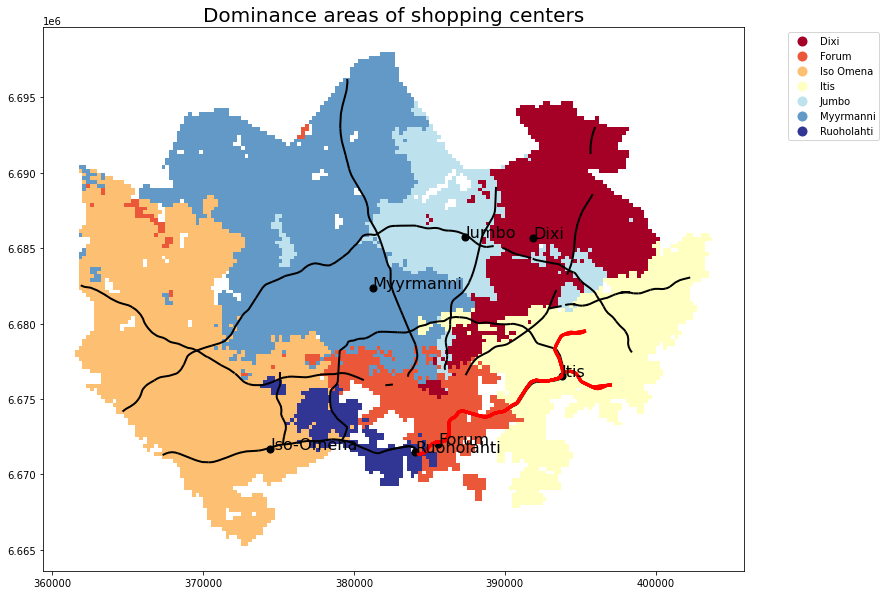

In [9]:
# Define output filename for the figure in here and use it when saving the file:
output_fp = "docs/dominance_areas_roads.png"

# Create plot
fig, ax = plt.subplots(figsize=(14,10))
grid.plot(ax=ax, column="dominant_s", cmap="RdYlBu", legend = True)
roads.plot(ax=ax, color="black", linewidth=2)# legend = True)
metro.plot(ax=ax, color="red", linewidth=3)#legend = True)
centers.plot(ax=ax, column="name", marker='o', color='black', markersize=50) #color="black")

#Add labels to points in the map
texts = []

for x, y, label in zip(centers.geometry.x, centers.geometry.y, centers["name"]):
    texts.append(plt.text(x, y, label, fontsize = 16))

#Set title
ax.set_title('Dominance areas of shopping centers', fontdict={'fontsize': '20', 'fontweight' : '4'})

#Put legend to place
ax.get_legend().set_bbox_to_anchor((1.2,1))

#Save figure
plt.savefig(output_fp, dpi=300)

## Problem 2: Visualize an interactive map

### Raven observations in Finland in 2021

Data source: laji.fi (https://laji.fi/observation/list)

In [10]:
#Import packages
import folium
from shapely import wkt

In [11]:
# Read data
fp_laji = "docs/laji-data.tsv"
data = pd.read_csv(fp_laji, sep='\t')
data.rename(columns={'WGS84 WKT':'geometry'}, inplace=True)

#Convert from wkt to crs
data['geometry'] = data['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(data, geometry='geometry')

geo_df.head()

,Havainnon luotettavuus,Aineiston laatu,Taksonominen järjestys,Laji,Määrä,Aika,Maa,Eliömaakunta,Sijainti,Aineisto,Havaintoerän tunniste,Havainnoija(t)/Kerääjä(t),Tieteellinen nimi,ETRS-TM35FIN N,ETRS-TM35FIN E,ETRS-TM35FIN N-min,ETRS-TM35FIN N-max,ETRS-TM35FIN E-min,ETRS-TM35FIN E-max,geometry
0,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-13 [10:00-11:00],Suomi,Satakunta (St),Rauma. Leilisuo.,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1333270,Jaakko Mäki-Jaakkola,Corvus corax,6783298.0,210050.0,6783297.0,6783298.0,210049.0,210050.0,POINT (21.62181 61.07708)
1,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-12 [9:38-11:30],Suomi,Pohjois-Häme (PH),Valkealahti,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1333172,"Tarmo Myntti, Kari Myntti",Corvus corax,6900734.0,376650.0,6899832.0,6901636.0,375763.0,377537.0,"LINESTRING (24.64067 62.21007, 24.64377 62.210..."
2,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-11,Suomi,Varsinais-Suomi (V),Fregattikatu 3,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1332986,Seppo Kallio,Corvus corax,6708699.0,235920.0,6708684.0,6708714.0,235895.0,235944.0,"POLYGON ((22.20013 60.42779, 22.20018 60.42781..."
3,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-10,Suomi,Kainuu (Kn),Sumsa,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1331853,Mikko Heikura,Corvus corax,7116259.0,584140.0,7116258.0,7116259.0,584139.0,584140.0,POINT (28.73041 64.16243)
4,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-10,Suomi,Varsinais-Suomi (V),Fregattikatu 3,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1332834,Seppo Kallio,Corvus corax,6708699.0,235920.0,6708684.0,6708714.0,235895.0,235944.0,"POLYGON ((22.20013 60.42779, 22.20018 60.42781..."


In [12]:
#Check data types
geo_df.dtypes

Havainnon luotettavuus         object
Aineiston laatu                object
Taksonominen järjestys          int64
Laji                           object
Määrä                          object
Aika                           object
Maa                            object
Eliömaakunta                   object
Sijainti                       object
Aineisto                       object
Havaintoerän tunniste          object
Havainnoija(t)/Kerääjä(t)      object
Tieteellinen nimi              object
ETRS-TM35FIN N                float64
ETRS-TM35FIN E                float64
ETRS-TM35FIN N-min            float64
ETRS-TM35FIN N-max            float64
ETRS-TM35FIN E-min            float64
ETRS-TM35FIN E-max            float64
geometry                     geometry
dtype: object

In [13]:
#Check CRS
geo_df.crs is None
#There is none. So we set one:
geo_df = geo_df.set_crs('epsg:4326')
geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

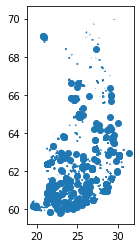

In [14]:
geo_df.plot()

In [15]:
#Convert polygons and linestrings to points based on their center
# Copy to new GeoDataFrame
points = geo_df.copy()
# Get the centroid
points.geometry = points["geometry"].centroid
# keep same crs
points.crs = geo_df.crs
points.head()

<ipython-input-15-43a114c0b30f>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points.geometry = points["geometry"].centroid


,Havainnon luotettavuus,Aineiston laatu,Taksonominen järjestys,Laji,Määrä,Aika,Maa,Eliömaakunta,Sijainti,Aineisto,Havaintoerän tunniste,Havainnoija(t)/Kerääjä(t),Tieteellinen nimi,ETRS-TM35FIN N,ETRS-TM35FIN E,ETRS-TM35FIN N-min,ETRS-TM35FIN N-max,ETRS-TM35FIN E-min,ETRS-TM35FIN E-max,geometry
0,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-13 [10:00-11:00],Suomi,Satakunta (St),Rauma. Leilisuo.,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1333270,Jaakko Mäki-Jaakkola,Corvus corax,6783298.0,210050.0,6783297.0,6783298.0,210049.0,210050.0,POINT (21.62181 61.07708)
1,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-12 [9:38-11:30],Suomi,Pohjois-Häme (PH),Valkealahti,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1333172,"Tarmo Myntti, Kari Myntti",Corvus corax,6900734.0,376650.0,6899832.0,6901636.0,375763.0,377537.0,POINT (24.62801 62.21847)
2,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-11,Suomi,Varsinais-Suomi (V),Fregattikatu 3,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1332986,Seppo Kallio,Corvus corax,6708699.0,235920.0,6708684.0,6708714.0,235895.0,235944.0,POINT (22.20048 60.42795)
3,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-10,Suomi,Kainuu (Kn),Sumsa,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1331853,Mikko Heikura,Corvus corax,7116259.0,584140.0,7116258.0,7116259.0,584139.0,584140.0,POINT (28.73041 64.16243)
4,NEUTRAL,HOBBYIST,54126,korppi — Corvus corax,1,2021-12-10,Suomi,Varsinais-Suomi (V),Fregattikatu 3,Lajitietokeskus/FinBIF - Vihkon yleiset havainnot,http://tun.fi/JX.1332834,Seppo Kallio,Corvus corax,6708699.0,235920.0,6708684.0,6708714.0,235895.0,235944.0,POINT (22.20048 60.42795)


In [16]:
# Create a Map instance
m = folium.Map(location=[64.5, 25], zoom_start=5, tiles="cartodbpositron")
# Convert points to GeoJSON
points_gjson = folium.features.GeoJson(points, name="Observations of Ravens in 2021", show=False,
                                      tooltip=folium.features.GeoJsonTooltip(fields=["Sijainti","Määrä"],
                                                                aliases = ["Location","Amount"],
                                                                labels=True,
                                                                sticky=False)
                       )
# Add points to the map instance
points_gjson.add_to(m)

In [17]:
#Get locations of points to create a cluster map
points["x"] = points["geometry"].x
points["y"] = points["geometry"].y
# Create a list of coordinate pairs
locations = list(zip(points["y"], points["x"]))

In [18]:
from folium.plugins import MarkerCluster
# Create a folium marker cluster
markers = MarkerCluster(locations, name = "Observations of Ravens in 2021 (clusters)")
# Add marker cluster to map
markers.add_to(m)
#Add layer control
folium.LayerControl().add_to(m)
# Show map
m

In [19]:
# Save map
outfp = "docs/ravens.html"
m.save(outfp)